In [1]:
import sys
sys.path.append("/root/anaconda3/Lib/site-packages/")
sys.path.append("root/Users/robert/anaconda3/Lib/site-packages")
import MLC_GP.MLC_GP as gp
import gymnasium as gym
import random
import numpy as np
import pde
import copy
import math
import gc
import time
from time import process_time
import shutput

C:\Users\robert\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\robert\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\robert\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\robert\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecate

  0%|          | 0/0.1 [00:00<?, ?it/s]

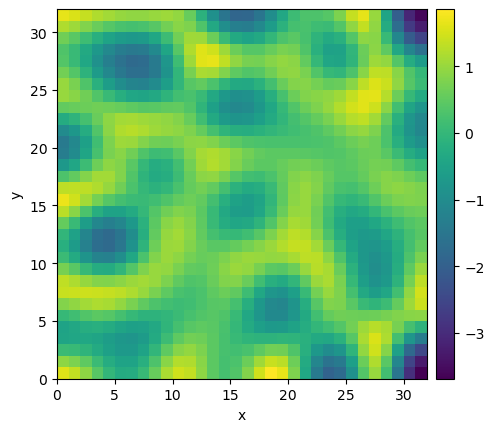

1.7879993915557861
0 3.7400050163269043
1 3.1219167709350586
2 3.6106598377227783
3 3.381202459335327
4 3.7569072246551514
5 3.021090269088745
6 3.4375715255737305
7 3.4586455821990967
8 3.1358065605163574
9 2.835939645767212
10 3.183894395828247
11 2.8921093940734863
12 3.4956047534942627
13 3.353489637374878
14 3.7079854011535645
15 3.7042737007141113
16 3.4760005474090576
17 3.6110002994537354
18 3.296004295349121
19 3.271000385284424
20 4.202998161315918
21 3.7249999046325684
22 3.662001371383667
23 3.815767526626587
24 3.52285099029541
25 3.112997531890869
26 3.2841298580169678
27 3.8413949012756348
28 3.313840866088867
29 2.9931888580322266
30 3.7502505779266357
31 3.4711837768554688
32 2.716026544570923
33 3.254601001739502
34 3.5589005947113037
35 3.7268974781036377
36 3.539135694503784
37 3.26277494430542
38 3.7466320991516113
39 3.1709628105163574
40 3.26143741607666
41 3.160184383392334
42 2.835397243499756
43 3.390280246734619
44 3.676452398300171
45 3.820138692855835
46 3.

In [15]:
from pde import PDEBase, ScalarField, UnitGrid


class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation."""

    def evolution_rate(self, state, t=0):
        """Implement the python version of the evolution equation."""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2



#observation, grid, state0 = env.reset(seed=412) uncomment for use with gym
grid = UnitGrid([32, 32])  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition
eq = KuramotoSivashinskyPDE()  # define the pde
solver=pde.ExplicitSolver(eq, scheme="euler", adaptive = True)

stepper=solver.make_stepper(state, dt=1e-3)
dt=0.1
t_current=0
start=time.time()
for i in range(100):
      t_current=stepper(state, t_current, t_current+dt)
result = eq.solve(state, t_range=0.1, dt=0.01)
result.plot()
print(time.time()-start)

state = ScalarField.random_uniform(grid)  # generate initial condition
eq = KuramotoSivashinskyPDE()  # define the pde
solver=pde.ExplicitSolver(eq, scheme="euler", adaptive = True)

for j in range(500):
    state = ScalarField.random_uniform(grid)  
    #stepper=solver.make_stepper(state, dt=1e-3)
    dt=0.1
    t_current=0
    start=time.time()
    for i in range(200):
          t_current=stepper(state, t_current, t_current+dt)
    #result = eq.solve(state, t_range=0.1, dt=0.01)
    print(j,time.time()-start)



In [16]:
target=np.empty(np.shape(grid.axes_coords[1]))
for i in range(len(grid.axes_coords[1])):
    target[i]=2*math.sin(3.14159265*grid.axes_coords[1][i]/16)
print(target)
reward=(state.data[:,20]-target)**2
print(reward)
reward=1*math.sqrt(np.sum(reward))
print(reward)

[ 0.19603428  0.58056935  0.94279347  1.26878657  1.54602091  1.76384253
  1.91388067  1.99036945  1.99036945  1.91388067  1.76384253  1.54602091
  1.26878657  0.94279348  0.58056936  0.19603429 -0.19603427 -0.58056935
 -0.94279347 -1.26878656 -1.5460209  -1.76384252 -1.91388067 -1.99036945
 -1.99036945 -1.91388067 -1.76384253 -1.54602091 -1.26878658 -0.94279349
 -0.58056937 -0.19603429]
[7.08773393e-02 9.23302530e-02 9.16592009e-03 1.03416091e+00
 1.11500561e+00 1.21447955e+00 1.53764313e+00 1.15828005e+00
 1.85307961e+00 3.50501164e+00 1.20132832e+00 2.25477638e+00
 1.15597710e-01 5.05325790e-01 6.88491789e-03 1.47965188e-01
 7.20892652e-01 1.99663720e+00 1.30973836e+00 1.63451991e+00
 4.95061392e+00 7.14977062e+00 3.74839195e+00 5.85526475e+00
 4.23051432e+00 6.14372985e+00 4.20782836e+00 5.35732973e+00
 5.02631255e+00 1.68589210e+00 2.27515939e+00 2.89739068e-01]
8.509068518932844


In [17]:
from pde import PDEBase, ScalarField, UnitGrid


class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation."""

    def evolution_rate(self, state, t=0):
        """Implement the python version of the evolution equation."""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2


In [3]:
# Open the file in binary mode 
forest=[]
import pickle
with open('file.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    forest = pickle.load(file) 


In [10]:
import pickle
with open('file.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(forest, file) 

In [12]:
#checking script
from pde import DiffusionPDE, ScalarField, UnitGrid
#observation, grid, state0 = env.reset(seed=412) uncomment for use with gym
grid = pde.CartesianGrid([[0, 5], [0, 5]], [20, 20], periodic=[True, True]) # generate grid, remove if use gym
state = ScalarField.random_uniform(grid, 0.0, 0.2)  #remove if use gym

Num_sens=3*3 #size of observation/sensor space in number of grid points
grid_dim=2 #x,y for including boundary location in alogrithim
Ns=grid_dim+Num_sens #sensors are first in s array, then x,y are last 2 elements

n_sense=int(np.sqrt(Num_sens))
meas=np.empty((n_sense,n_sense))
dimx=state.data.shape[0]
dimy=state.data.shape[1]
startx=round((dimx-n_sense)/2)
starty=round((dimy-n_sense)/2)

bc_y="periodic"
bc_x="periodic"
eq = DiffusionPDE(diffusivity=1., bc=[bc_x, bc_y])
solver=pde.ExplicitSolver(eq, scheme="euler", adaptive = True)
#result = eq.solve(state, t_range=dt, adaptive=True, tracker=None)
stepper=solver.make_stepper(state, dt=1e-3)

best=bestTree
#best=['+', 'math.cos', '-', 's6', '+', 's6', 's5', '+', '+', 's10', 's9', '-', 's8', 's4']

#initialize arrays to hold control inputs along each boundary
left_control=np.zeros(grid.shape[1])

for t in range(250):

    control_name=best

    s=sensor_meas(Num_sens,state.data) #change to implemetn state if gym
    #to make control/boundary array, first update algorthim variables with sensor values (1:n-2 variables)
    for j in range(Num_sens):
        obs_name='s'+str(j)
        control_name=[s[j].item() if c==obs_name else c for c in control_name]  
    #assign values to boundary controls.  
    #this implementation ASSUMES square grid.  
    #if rectangular need to break into iterating over left/right and top/bottom
    for j in range(grid.shape[0]):
        #left bound
        holder_left=copy.copy(control_name)
        holder_right=copy.copy(control_name)
        # holder_top=copy.copy(control_name)
        # holder_bottom=copy.copy(control_name)
        for l in range(Num_sens, Ns):
            obs_name='s'+str(l)
            holder_left=[left_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_left]
            holder_right=[right_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_right]
            # holder_bottom=[bottom_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_bottom]
            # holder_top=[top_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_top]
        k,dummy=gp.evaluate(holder_left)
        if k>10:  k=10.0
        elif k<-10:  k=-10.0
        left_control[j]=k

        kr,dummy=gp.evaluate(holder_right)
        if kr>10:  kr=10.0
        elif kr<-10:  kr=-10.0
        right_control[j]=kr

    #implement.state.data[:,1]=left_control #uncomment for gym
    state.data[:,1]=left_control #coordinates will be 1*dx off, so not "leaerning" exact physics
    state.data[:,18]=right_control

    t_current=stepper(state, t_current, t_current+dt)

for yy in range(n_sense):
    for xx in range(n_sense):
        meas[yy,xx]=float(result.data[yy+startx,xx+starty])
print(meas)
#result.plot()

[[0.70285649 0.73202997 0.73196314]
 [1.11061805 1.10230086 1.10222084]
 [1.51050994 1.4669815  1.46687206]]


In [ ]:
#############################################################
###Using left, right Boundary as control.##########################
#############################################################

#set up PDE system, using pre-defined class for KS-equation
#setting up stepper
from pde import DiffusionPDE, ScalarField, UnitGrid
#observation, grid, state0 = env.reset(seed=412) uncomment for use with gym
grid = UnitGrid([32, 32])  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition
eq = KuramotoSivashinskyPDE()  # define the pde
solver=pde.ExplicitSolver(eq, scheme="euler", adaptive = True)
#result = eq.solve(state, t_range=dt, adaptive=True, tracker=None)
stepper=solver.make_stepper(state, dt=5e-3)

#set up forest parameters
Ni=300 #number of individuals
Np=25 #idnvidiuals selected for advancement tournament each round
Ne=5  #best Ne of each forest advanced unchanged
Nn=0.4 #for reseed, precent reseeded each round

Num_sens=len(grid.axes_coords[1]) #size of observation/sensor space in number of grid points
grid_dim=2 #x,y for including boundary location in alogrithim
Ns=grid_dim+Num_sens #sensors are first in s array, then x,y are last 2 elements

Pr=0.1 #probably of replication
Pm=0.3 #probably of mutation
Pc=0.6 #probably of crossover

maxi=500 #set max number of iterations
dt=0.1 #timestep for iteration

#define entire boundary as controller.  Use grid's axes_coords attribute to pull coordinates, along with 
#min or max x,y values from axes_bounds to calculate an array of control inputs for each boundary.
#will need to use .item() for each of those

#now set up entire array for boundary coordinates.  first row is x coords, second is y coords
##############FIX#####################
#bottom and top should have constant value for y and variable for x; left and right should have const x and variable y
#not super important as long as consistent for all controls which sN, sN-1 variables map to what
#axes_bounds[0][1] is max x
#bounds are x cord 1st row, y coord 2nd row
#uncomment if using boundary control

left_bound=np.full(len(grid.axes_coords[1]), grid.axes_bounds[0][0].item())  #
left_bound=np.vstack((left_bound, grid.axes_coords[1]))
right_bound=np.full(len(grid.axes_coords[1]), grid.axes_bounds[0][1].item())#
right_bound=np.vstack((right_bound, grid.axes_coords[1]))

# bottom_bound=grid.axes_coords[0]
# bottom_bound=np.vstack((bottom_bound, np.full(len(bottom_bound), grid.axes_bounds[1][0].item())))
# top_bound=grid.axes_coords[0]
# top_bound=np.vstack((top_bound, np.full(len(top_bound), grid.axes_bounds[1][1].item())))

# #initialize arrays to hold control inputs along each boundary
left_control=np.zeros(grid.shape[1])
right_control=np.zeros(grid.shape[1])
# bottom_control=np.zeros(grid.shape[0])
# top_control=np.zeros(grid.shape[0])

#set up target and evaluation parameters to evaluate reward
#target is sine wave across one row
target=np.empty(np.shape(grid.axes_coords[1]))
for i in range(len(grid.axes_coords[1])):
    target[i]=2*math.sin(3.14159265*grid.axes_coords[1][i]/16)

target_row=20                         
      
#controller will be defined by the control vectors passed to py-pde via gymnasium.  Wherever controllers are set (probably here)
#controller location variable is only half of controller location.  the other is which boundaries.  
#can do different location along each boundary or same.  Here, for simplicity, do same along each boundary that has a control.  
#Controls are just boundary conditions on the boundary controls
#however, gymnaisum will have hard-coded which boundaries have controls--this will get "value" as an array

#Generally, implementing control requires planning and some hard coding.  User must know before coding controller how many gridpoints
#are on each boundary with a controller, decide what boundary(ies) to put controller on
#how many control points on the boundary(ies), how many girdpoints each control point uses, if control points are at same location
#on each boundary, and, below, the x/y coordinates for each control point to calculate the control input arries for each boundary.
#the control is implemented by an array with number of values equal to the grid points on the associated boundary.  
#Recommended for easier implementation to make control type same type as boundary layer (i.e. dirchliet vs neumann)
#array will have boundary condition (say, 0 dirchlet) everywhere except the control grid points, which will have value
#determined by algorithm at control point and constant over grid points matching control size.  
#also need to know real extents of boundary--i.e. is each cell 1 unit or 1/32 unit, etc. via dx, dy which is hard coded based on grid design
#i.e. if a right boundary is 32 grid points tall and control location is halfway up the boundary (location 16) with size of 3
#then control will be calculated based on xmax, ymax/2, sensor readings and then applied at cells 15, 16, 17

#need to get initial measurements from observation, fortunately already is a numpy array (!)
#now this is less than Ns (and so then number of variables), remaineders are x,y location for all controllers (num_control)
#s=sensor_meas(Num_sens,state0.data)


forest=[]
#generate forest of Ni trees
for i in range(0,Ni):
    seed=gp.sapling(5,10,Ns)
    trial=gp.growTrig(0,2,seed)
    forest.append(seed)

minJ=50000 #set initial "best" cost
m=0 #iteration counter
max_t=0.5


while (minJ>1. and m<maxi):
    #make random starting point each forest generation, but same for each tree per generation
    #n=random.randint(0,10000)
    nt=0
    for t in forest:
        subtotal=0
        nt+=1
        state = ScalarField.random_uniform(grid)
        stepper=solver.make_stepper(state, dt=5e-3)
        #make sure reward is reset in case tree is reused
        t.total=0
        time1=time.time()
        time1a=process_time()
        dt=0.1
        t_current=0.
        for i in range(150):
            control_name=t.name
            #need to replace each "sensor" value with updated observation
            #will need to also replace x and y values for controller locations, which result in a vector of results
            #one element per controller
            #probably have each controller operate across several cells
            #best to just make an array of control inputs here or in gym and then push to py-pde boundary as value
            s=state.data[:,target_row] 
            #to make control/boundary array, first update algorthim variables with sensor values (1:n-2 variables)
            for j in range(Num_sens):
                obs_name='s'+str(j)
                control_name=[s[j].item() if c==obs_name else c for c in control_name]  
            #assign values to boundary controls.  
            #this implementation ASSUMES square grid.  
            #if rectangular need to break into iterating over left/right and top/bottom
            for j in range(grid.shape[0]):
                #left bound
                holder_left=copy.copy(control_name)
                holder_right=copy.copy(control_name)
                # holder_top=copy.copy(control_name)
                # holder_bottom=copy.copy(control_name)
                for l in range(Num_sens, Ns):
                    obs_name='s'+str(l)
                    holder_left=[left_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_left]
                    holder_right=[right_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_right]
                    # holder_bottom=[bottom_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_bottom]
                    # holder_top=[top_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_top]
                k,dummy=gp.evaluate(holder_left)
                if k>2:  k=2.0
                elif k<-2:  k=-2.0
                left_control[j]=k

                kr,dummy=gp.evaluate(holder_right)
                if kr>2:  kr=2.0
                elif kr<-2:  kr=-2.0
                right_control[j]=kr
                # k,dummy=gp.evaluate(holder_right)
                # if k>5:  k=5.0
                # elif k<-5:  k=-5.0
                # right_control[j]=k
                # k,dummy=gp.evaluate(holder_bottom)
                # if k>5:  k=5.0
                # elif k<-5:  k=-5.0
                # bottom_control[j]=k
                # k,dummy=gp.evaluate(holder_top)
                # if k>5:  k=5.0
                # elif k<-5:  k=-5.0
                # top_control[j]=k
            
            state.data[:,1]=left_control #coordinates will be 1*dx off, so not "leaerning" exact physics
            # state.data[:,18]=right_control
            
            start=time.time()
            t_current=stepper(state, t_current, t_current+dt)
            t_check=time.time()-start

            reward=(state.data[:,target_row]-target)**2
            reward=1*math.sqrt(np.sum(reward))
            if reward<1.0: #if average less than about 0.1 difference from target, consider done
                reward+=-50
                break
            if len(t.name)>100:
                reward+=5
            # if t_check>max_t and i>3:
            #     print(t_check, m, nt, i)
            #     max_t=t_check
            if np.max(state.data)>20:
                reward=100
                print('diverge')
                break
                                
            #state=result

        print(nt, time.time()-time1)
        t.total=reward#subtotal #use reward instead of subtotal if only interested in final state
        # if nt>5 and nt<10:
        #     print("loop time:  ",time.time()-time1, t_check, m, nt)
        if t.total<minJ: 
            minJ=t.total
            bestTree=t.name
            print(m, minJ, bestTree)
#either "tournament" or reseed random half of the forest
    #uncomment below for reseed random half of forest
    
    forest=gp.evolution_reseed(Nn, Ni, Ne,Pc, Pm, forest)
    m+=1
    #uncomment below for tournament approach
    #need to choose Np individuals for each selection round. 
    # next_forest=selection(Ni, Np, forest)
    # for t in next_forest:
    #     if len(t.name)==0: print("selection empty")
print(m, minJ, bestTree)    

1 4.874683618545532
0 10.557232464884354 ['+', 'math.sin', 'math.cos', '+', '+', 's27', 's16', '*', 's10', 's8', '*', '+', '*', '*', 's19', 's28', '-', 's8', 's24', '-', 'math.cos', 'math.cos', 's27', '-', 's8', 's32', '*', '*', '+', 's26', 's26', '*', '+', 's4', 's17', 's14', '+', '-', 's12', 's24', '+', 's15', 's9']
